# Pregunta 3:
## ¿Qué dimensión del capital familiar: cultural (educación de los padres) o económico (estrato y bienes del hogar) tiene mayor poder explicativo sobre el desempeño en el Saber 11, y cómo cambia esa relación entre áreas evaluadas (Matemáticas, Lectura Crítica, Inglés, Ciencia y Ciencias Sociales)?

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Leer datos
df = pd.read_csv("df_limpio.csv")

# Ver primeras filas
df.head()


,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM,EDU_MAX_HOGAR
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,Dos,...,No,A-,42.0,26.0,45.0,42.0,43.0,196.0,2,1
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHI,10/02/2005,M,COLOMBIA,Tres,...,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0,7,4
2,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,Tres,...,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0,10,5
3,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,Dos,...,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0,7,7
4,20224,URBANO,NaN,MIXTO,TARDE,SOACHA,26/08/2003,F,COLOMBIA,Tres,...,No,A-,44.0,44.0,36.0,31.0,48.0,200.0,8,6


In [61]:
df.shape


(285577, 27)

In [62]:
cols = [
    "PUNT_GLOBAL",
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "DESEMP_INGLES",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
]

df = df[cols].copy()
df.shape

(285577, 14)

In [63]:
df.isnull().sum().sort_values(ascending=False)


FAMI_TIENEAUTOMOVIL         367
FAMI_TIENELAVADORA          165
PUNT_INGLES                  23
DESEMP_INGLES                22
PUNT_MATEMATICAS              0
PUNT_GLOBAL                   0
PUNT_SOCIALES_CIUDADANAS      0
PUNT_C_NATURALES              0
PUNT_LECTURA_CRITICA          0
FAMI_EDUCACIONMADRE           0
FAMI_ESTRATOVIVIENDA          0
FAMI_EDUCACIONPADRE           0
FAMI_TIENECOMPUTADOR          0
FAMI_TIENEINTERNET            0
dtype: int64

Hay un gran porcentaje de datos faltantes, 171,841 Lo cual es gigante, pues se podría decir el propósito del dataset es puntaje del icfes, sin emabrgo, al ver que hay en total 470mil datos, tenemos datos válidos por al menos 298k.

In [64]:
# Quitar personas que no tienen puntajes por área
df = df.dropna(subset=[
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_INGLES"
])

# Revisar nuevamente
print(df.isna().sum())

# Ver tamaño actual
df.shape

PUNT_GLOBAL                   0
PUNT_MATEMATICAS              0
PUNT_LECTURA_CRITICA          0
PUNT_C_NATURALES              0
PUNT_SOCIALES_CIUDADANAS      0
PUNT_INGLES                   0
DESEMP_INGLES                 0
FAMI_EDUCACIONMADRE           0
FAMI_EDUCACIONPADRE           0
FAMI_ESTRATOVIVIENDA          0
FAMI_TIENEAUTOMOVIL         367
FAMI_TIENECOMPUTADOR          0
FAMI_TIENEINTERNET            0
FAMI_TIENELAVADORA          165
dtype: int64


(285554, 14)

In [65]:
df = df.dropna(subset=[
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
])

print(df.isna().sum())
df.shape

PUNT_GLOBAL                 0
PUNT_MATEMATICAS            0
PUNT_LECTURA_CRITICA        0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 0
DESEMP_INGLES               0
FAMI_EDUCACIONMADRE         0
FAMI_EDUCACIONPADRE         0
FAMI_ESTRATOVIVIENDA        0
FAMI_TIENEAUTOMOVIL         0
FAMI_TIENECOMPUTADOR        0
FAMI_TIENEINTERNET          0
FAMI_TIENELAVADORA          0
dtype: int64


(285091, 14)

Limpiamoz el data set, para que todos los posibles datos que necesutemos esten completos. contamos con un total de 287mil datos

No sé como tratar la dimensión la dimensión cultural, si po rsperado, crear un indice conjunto, o tomar solo el de la madre, al ser probablemente más relevante

In [66]:
df["FAMI_EDUCACIONMADRE"].value_counts().sort_index()

FAMI_EDUCACIONMADRE
0      5244
1      3565
2     37359
3     38722
4     42828
5     77481
6      8238
7     25134
8      6973
9     31473
10     8074
Name: count, dtype: int64

In [67]:
df["FAMI_EDUCACIONMADRE"].value_counts().sort_index()

FAMI_EDUCACIONMADRE
0      5244
1      3565
2     37359
3     38722
4     42828
5     77481
6      8238
7     25134
8      6973
9     31473
10     8074
Name: count, dtype: int64

In [68]:
#Distribucipon conjunta me permite ver en una matriz como encajan los datos en relación con los otros
pd.crosstab(
    df["FAMI_EDUCACIONMADRE"], 
    df["FAMI_EDUCACIONPADRE"]
)

FAMI_EDUCACIONPADRE,0,1,2,3,4,5,6,7,8,9,10
FAMI_EDUCACIONMADRE,,,,,,,,,,,
0,3097,49,324,223,330,515,62,190,82,312,60
1,132,1794,816,339,182,206,21,31,5,33,6
2,1597,1955,21371,5632,3368,2669,196,261,70,215,25
3,1577,1271,9069,17170,4252,4345,193,446,108,266,25
4,2230,1103,8192,6568,13937,7910,558,1148,332,786,64
5,4235,1331,8049,8821,11243,33463,1585,4024,968,3432,330
6,482,115,490,511,1142,2315,1315,945,243,590,90
7,1779,261,1197,1280,2682,6659,941,5965,854,3093,423
8,525,68,206,239,572,1396,277,678,1184,1548,280


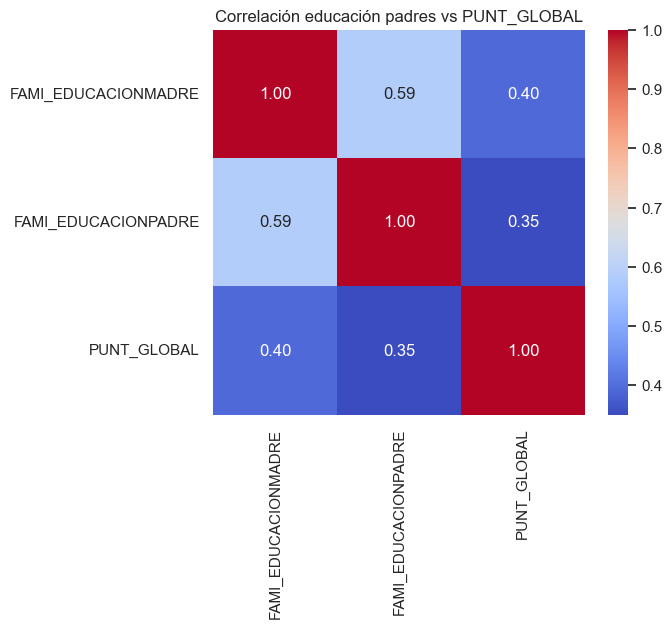

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[[
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "PUNT_GLOBAL"
]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación educación padres vs PUNT_GLOBAL")
plt.show()

Dado que la educación materna y paterna presentan una correlación moderada (ρ = 0.59), pero no lo suficientemente alta como para considerarlas redundantes, se construyó un indicador agregado de capital cultural del hogar utilizando el máximo nivel educativo alcanzado por alguno de los padres.

In [70]:
df["EDU_MAX_HOGAR"].describe()

KeyError: 'EDU_MAX_HOGAR'

In [ ]:
df

,PUNT_GLOBAL,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,DESEMP_INGLES,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,EDU_MAX_HOGAR
0,196.0,26.0,43.0,42.0,45.0,42.0,A-,1,1,1.0,No,NO,NO,No,1
1,258.0,60.0,50.0,54.0,46.0,40.0,A-,4,3,1.0,No,SI,SI,Si,4
3,302.0,54.0,60.0,63.0,64.0,62.0,A2,5,5,2.0,No,SI,SI,Si,5
4,241.0,45.0,52.0,48.0,46.0,54.0,A1,7,0,2.0,No,NO,SI,Si,7
5,200.0,44.0,48.0,31.0,36.0,44.0,A-,2,6,2.0,No,SI,SI,No,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470812,218.0,42.0,47.0,45.0,41.0,41.0,A-,2,2,1.0,No,SI,NO,Si,2
470813,325.0,77.0,58.0,61.0,66.0,59.0,A2,2,2,1.0,No,NO,NO,No,2
470814,191.0,36.0,40.0,42.0,33.0,43.0,A-,9,4,2.0,No,SI,NO,Si,9
470815,220.0,50.0,57.0,35.0,37.0,34.0,A-,4,2,2.0,Si,SI,NO,Si,4


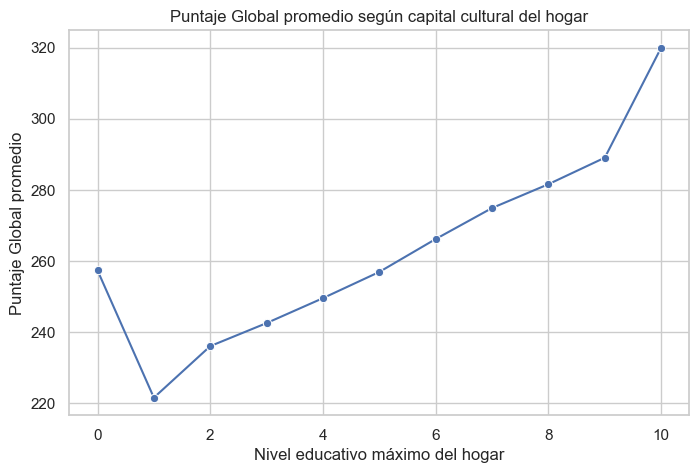

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular promedio por nivel educativo
promedios = df.groupby("EDU_MAX_HOGAR")["PUNT_GLOBAL"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=promedios,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    marker="o"
)

plt.title("Puntaje Global promedio según capital cultural del hogar")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global promedio")
plt.show()

In [ ]:
df["EDU_MAX_HOGAR"].value_counts().sort_index()

EDU_MAX_HOGAR
0      3160
1      2011
2     26431
3     35607
4     40580
5     83435
6      9078
7     27952
8      7873
9     39777
10    11570
Name: count, dtype: int64

In [ ]:
resumen = df.groupby("EDU_MAX_HOGAR")["PUNT_GLOBAL"].agg(
    N="count",
    PROMEDIO="mean",
    MEDIANA="median",
    STD="std"
).reset_index()

resumen

,EDU_MAX_HOGAR,N,PROMEDIO,MEDIANA,STD
0,0,3160,257.380380,255.0,50.061029
1,1,2011,221.612631,217.0,38.642250
2,2,26431,236.093073,234.0,39.008267
3,3,35607,242.570702,240.0,39.191311
4,4,40580,249.578512,248.0,40.134676
5,5,83435,256.942422,256.0,41.712558
6,6,9078,266.188918,267.0,41.457413
7,7,27952,274.901009,276.0,41.773572
8,8,7873,281.592658,283.0,44.477695
9,9,39777,289.042361,291.0,47.219819


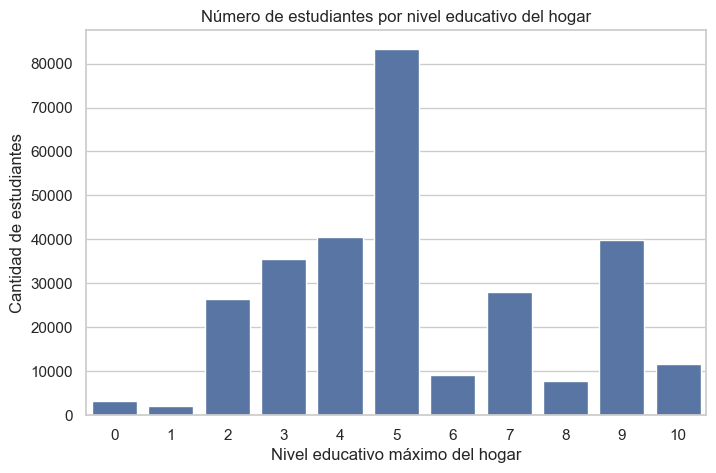

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conteo = df["EDU_MAX_HOGAR"].value_counts().sort_index().reset_index()
conteo.columns = ["EDU_MAX_HOGAR", "N"]

plt.figure(figsize=(8,5))
sns.barplot(data=conteo, x="EDU_MAX_HOGAR", y="N")
plt.title("Número de estudiantes por nivel educativo del hogar")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Cantidad de estudiantes")
plt.show()

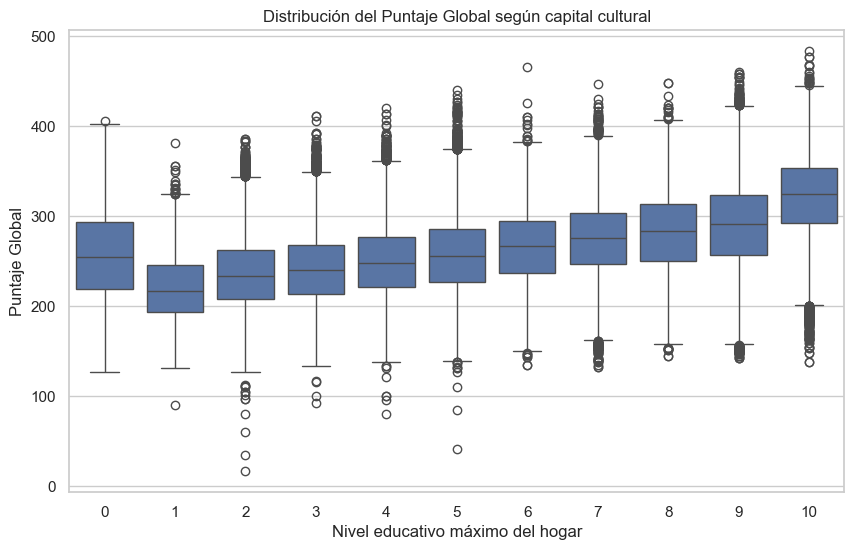

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    data=df
)

plt.title("Distribución del Puntaje Global según capital cultural")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global")
plt.show()

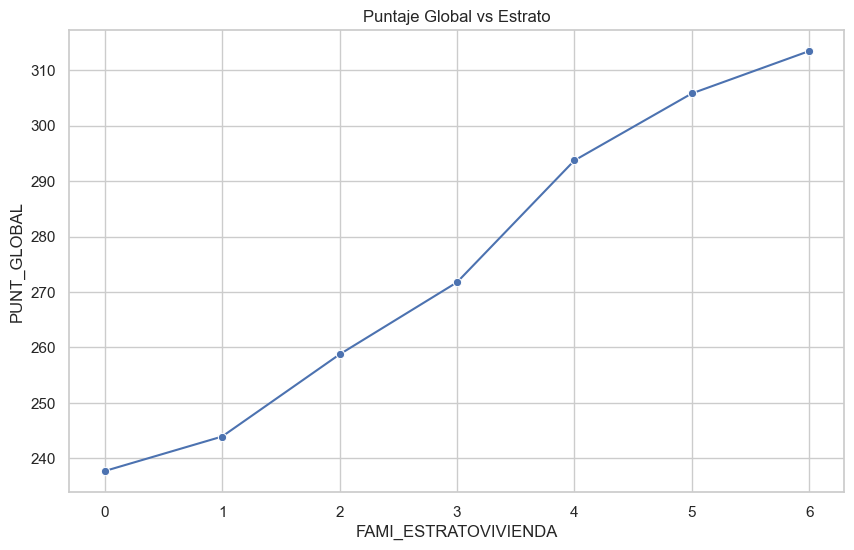

In [ ]:
prom_estrato = df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean().reset_index()

sns.lineplot(data=prom_estrato,
             x="FAMI_ESTRATOVIVIENDA",
             y="PUNT_GLOBAL",
             marker="o")

plt.title("Puntaje Global vs Estrato")
plt.show()

Para poder comparar, efectivamente las otras variables del capital social de los Estudiantes, vamos a crear un Indice que agrupe todas las demás variables, (que no sean Estrato)

Los datos no vienen como 0 o 1, entonces primero vamos a estandarizar, y después convertir en 0 1, para poder construir un indicador simple, que sume por cada aspecto que tenga el estudiante, es decir va de 0 a 4

In [ ]:
binarias = [
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
]

for col in binarias:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()     # quitar espacios
        .str.upper()     # todo en mayúscula
    )

In [ ]:
for col in binarias:
    df[col] = df[col].map({
        "SI": 1,
        "SÍ": 1,
        "NO": 0
    })

In [ ]:
for col in binarias:
    print(col)
    print(df[col].value_counts(dropna=False))
    print("------")

FAMI_TIENEAUTOMOVIL
FAMI_TIENEAUTOMOVIL
0    195962
1     91512
Name: count, dtype: int64
------
FAMI_TIENECOMPUTADOR
FAMI_TIENECOMPUTADOR
1    196821
0     90653
Name: count, dtype: int64
------
FAMI_TIENEINTERNET
FAMI_TIENEINTERNET
1    189452
0     98022
Name: count, dtype: int64
------
FAMI_TIENELAVADORA
FAMI_TIENELAVADORA
1    224924
0     62550
Name: count, dtype: int64
------


In [ ]:
df["INDICE_ECON"] = (
    df["FAMI_TIENEAUTOMOVIL"] +
    df["FAMI_TIENECOMPUTADOR"] +
    df["FAMI_TIENEINTERNET"] +
    df["FAMI_TIENELAVADORA"]
)
df

,PUNT_GLOBAL,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,DESEMP_INGLES,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,EDU_MAX_HOGAR,INDICE_ECON
0,196.0,26.0,43.0,42.0,45.0,42.0,A-,1.0,0,0,0,0,1,0
1,258.0,60.0,50.0,54.0,46.0,40.0,A-,1.0,0,1,1,1,4,3
3,302.0,54.0,60.0,63.0,64.0,62.0,A2,2.0,0,1,1,1,5,3
4,241.0,45.0,52.0,48.0,46.0,54.0,A1,2.0,0,0,1,1,7,2
5,200.0,44.0,48.0,31.0,36.0,44.0,A-,2.0,0,1,1,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470812,218.0,42.0,47.0,45.0,41.0,41.0,A-,1.0,0,1,0,1,2,2
470813,325.0,77.0,58.0,61.0,66.0,59.0,A2,1.0,0,0,0,0,2,0
470814,191.0,36.0,40.0,42.0,33.0,43.0,A-,2.0,0,1,0,1,9,2
470815,220.0,50.0,57.0,35.0,37.0,34.0,A-,2.0,1,1,0,1,4,3


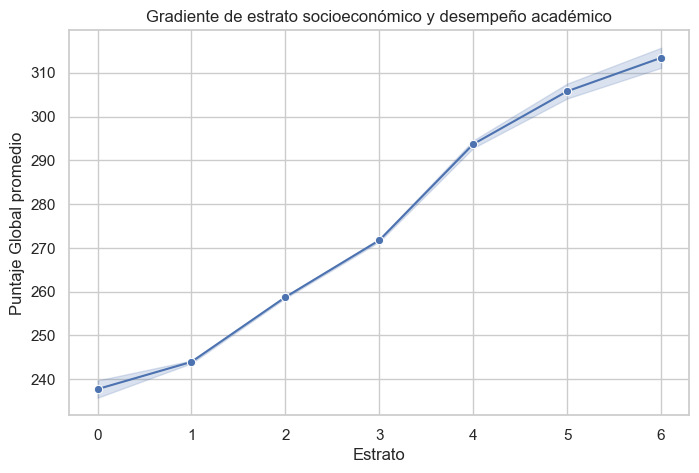

In [ ]:
plt.figure(figsize=(8,5))

sns.lineplot(
    data=df,
    x="FAMI_ESTRATOVIVIENDA",
    y="PUNT_GLOBAL",
    estimator="mean",
    marker="o"
)

plt.title("Gradiente de estrato socioeconómico y desempeño académico")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global promedio")
plt.show()

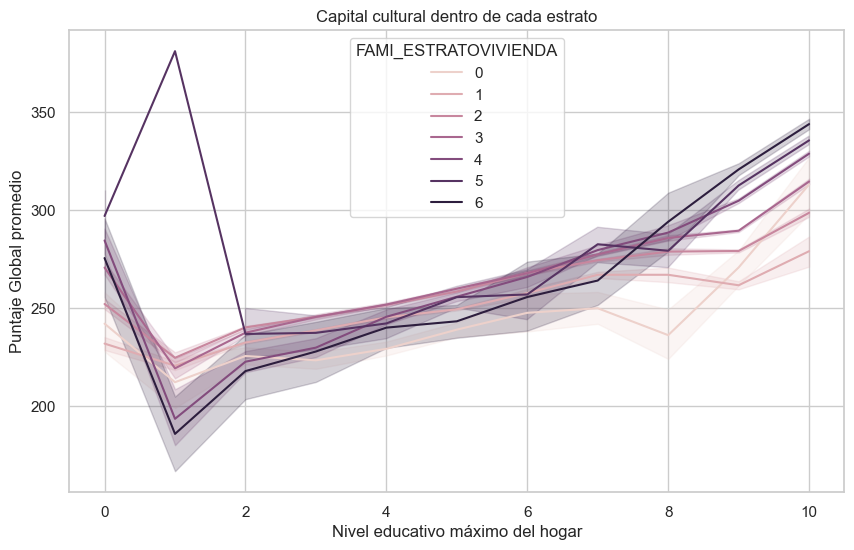

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    estimator="mean"
)

plt.title("Capital cultural dentro de cada estrato")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global promedio")
plt.show()

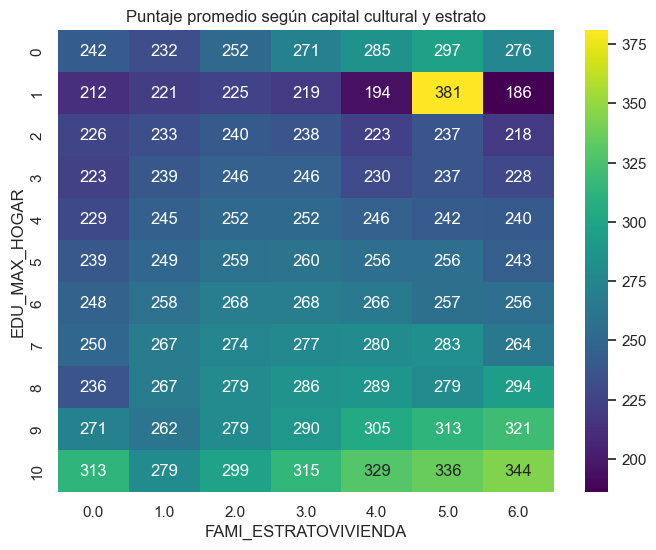

In [ ]:
tabla = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(tabla, annot=True, fmt=".0f", cmap="viridis")

plt.title("Puntaje promedio según capital cultural y estrato")
plt.show()

In [ ]:
tabla_n = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="count"
)

tabla_n

FAMI_ESTRATOVIVIENDA,0.0,1.0,2.0,3.0,4.0,5.0,6.0
EDU_MAX_HOGAR,,,,,,,
0,63,574,1276,903,251,74,19
1,36,982,764,196,28,1,4
2,368,12080,11097,2601,226,46,13
3,326,13714,17451,3587,354,123,52
4,418,11383,20932,6982,618,160,87
5,648,15584,43730,21034,1897,347,195
6,93,1163,4270,3067,373,81,31
7,143,2878,13392,10143,1165,158,73
8,66,569,2970,3408,646,154,60


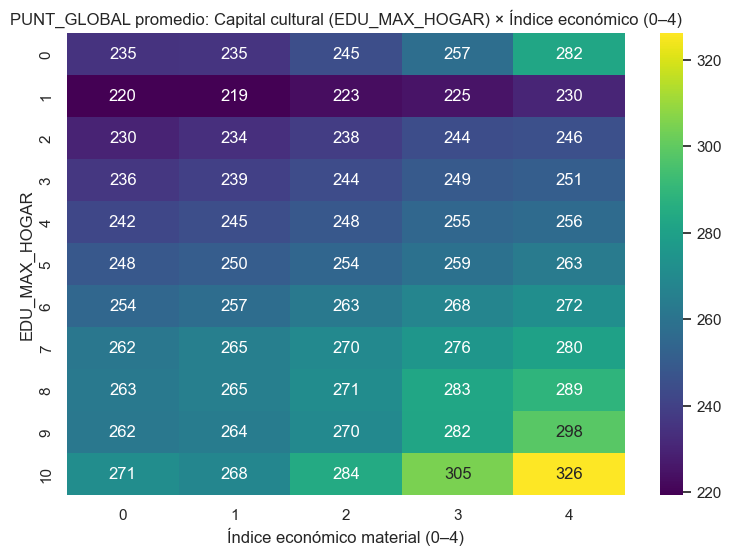

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_ie = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="INDICE_ECON",
    aggfunc="mean"
)

plt.figure(figsize=(9,6))
sns.heatmap(tabla_ie, annot=True, fmt=".0f", cmap="viridis")
plt.title("PUNT_GLOBAL promedio: Capital cultural (EDU_MAX_HOGAR) × Índice económico (0–4)")
plt.xlabel("Índice económico material (0–4)")
plt.ylabel("EDU_MAX_HOGAR")
plt.show()

In [ ]:
tabla_mean = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="mean"
)

tabla_n = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="count"
)

In [ ]:
tabla_filtrada = tabla_mean.mask(tabla_n < 50)

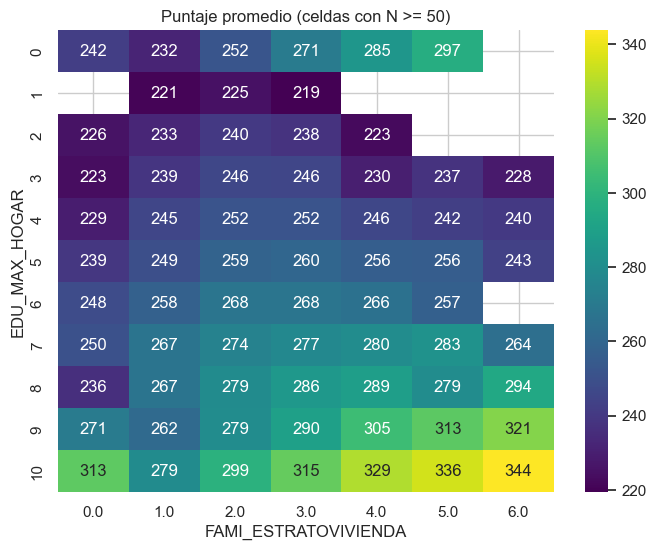

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(tabla_filtrada, annot=True, fmt=".0f", cmap="viridis")
plt.title("Puntaje promedio (celdas con N >= 50)")
plt.show()

In [ ]:
tabla_mediana = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="median"
)

In [ ]:
# Crear categoría agrupada de capital cultural

df["EDU_GRUPO"] = pd.cut(
    df["EDU_MAX_HOGAR"],
    bins=[-1, 2, 6, 10],
    labels=["Bajo (0-2)", "Medio (3-6)", "Alto (7-10)"]
)

df["EDU_GRUPO"].value_counts()

KeyError: 'EDU_MAX_HOGAR'

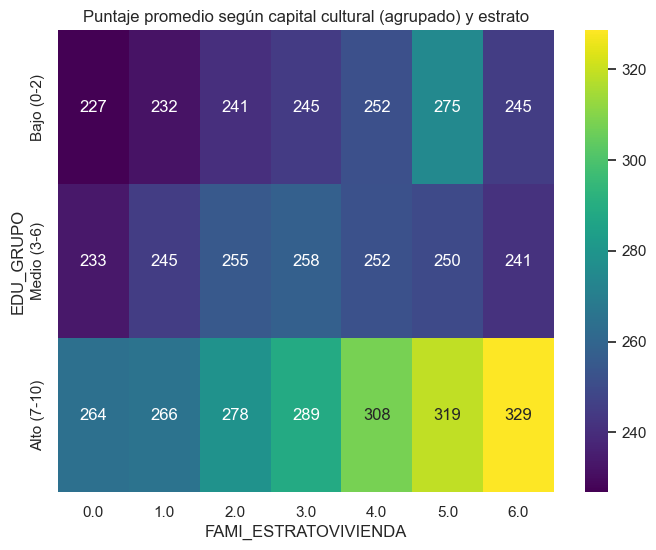

In [ ]:
tabla_group = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_GRUPO",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(tabla_group, annot=True, fmt=".0f", cmap="viridis")
plt.title("Puntaje promedio según capital cultural (agrupado) y estrato")
plt.show()

In [ ]:
df.columns

Index(['PUNT_GLOBAL', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA',
       'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
       'DESEMP_INGLES', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA'],
      dtype='str')

In [ ]:
g = sns.FacetGrid(df, col="ESTRATO_GRUPO", height=4, aspect=1.2, sharey=True)
g.map_dataframe(
    sns.lineplot,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    hue="INDICE_ECON",
    estimator="mean",
    errorbar=None
)
g.add_legend(title="Índice Econ (0–4)")
g.set_axis_labels("EDU_MAX_HOGAR", "PUNT_GLOBAL promedio")
g.set_titles(col_template="Estrato: {col_name}")
plt.suptitle("PUNT_GLOBAL vs EDU_MAX_HOGAR por estrato, diferenciando comodidades del hogar", y=1.05)
plt.show()

NameError: name 'sns' is not defined

KeyError: 'ESTRATO_GRUPO'

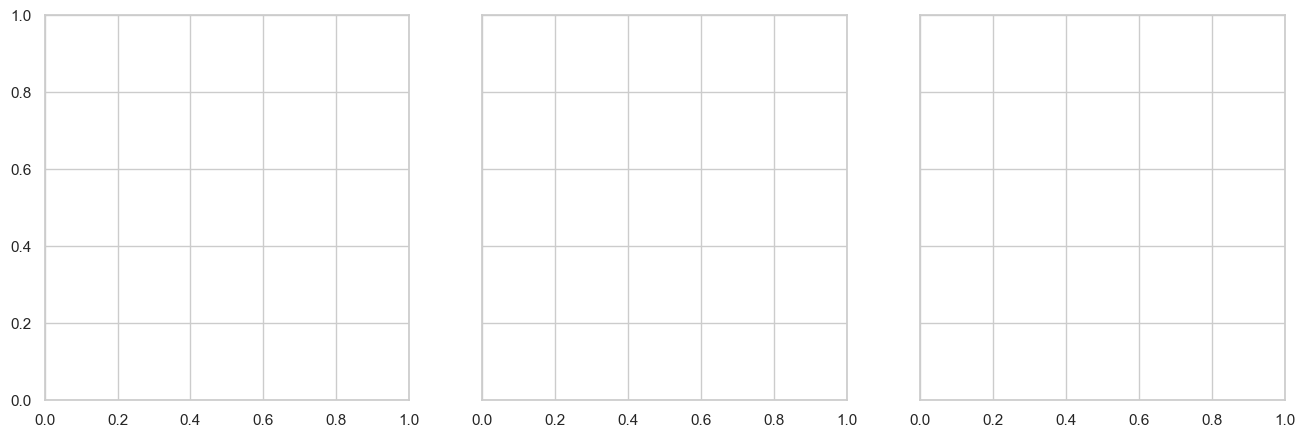

In [ ]:
import numpy as np

orden_edu = ["Bajo (0-2)", "Medio (3-6)", "Alto (7-10)"]
orden_ie = [0,1,2,3,4]
orden_est = ["Bajo (1-2)", "Medio (3-4)", "Alto (5-6)"]

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for ax, est in zip(axes, orden_est):
    sub = df[df["ESTRATO_GRUPO"] == est]
    tabla = sub.pivot_table(
        values="PUNT_GLOBAL",
        index="EDU_GRUPO",
        columns="INDICE_ECON",
        aggfunc="mean"
    ).reindex(index=orden_edu, columns=orden_ie)

    sns.heatmap(tabla, annot=True, fmt=".0f", cmap="viridis", ax=ax)
    ax.set_title(f"Estrato {est}")
    ax.set_xlabel("Índice Econ (0–4)")
    ax.set_ylabel("EDU_GRUPO" if ax is axes[0] else "")

plt.suptitle("PUNT_GLOBAL promedio: Capital cultural (agrupado) × Comodidades, por estrato", y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
sns.catplot(
    data=df,
    x="INDICE_ECON",
    y="PUNT_GLOBAL",
    hue="EDU_GRUPO",
    col="ESTRATO_GRUPO",
    kind="box",
    height=4,
    aspect=1.1,
    showfliers=False
)

plt.suptitle("Distribución de PUNT_GLOBAL por comodidades (Índice Econ), capital cultural y estrato", y=1.05)
plt.show()

ValueError: Could not interpret value `INDICE_ECON` for `x`. An entry with this name does not appear in `data`.